### Problem Statement
Property owners on Airbnb are unsure of the listing price to maximize revenue. Can an ML-based solution suggest an appropriate listing price to the owner when they try to list a property out for rent?

### Problem statement and data
You have been given access to data from the data warehouse of an online aggregator for properties that tourists can rent out for short durations. The current sample is from all the listings in Antwerp Belgium.

**`The task is to generate an ML-based solution that can be used to suggest an appropriate listing price to the property owner when they try to list a property out for rent.`**

The dataset was pulled from a data warehouse and has the following tables:

Calendar (Data on listings in Chronological Order)

listing_id (Unique id for each listing)

date (Date on which listing was made)

available (1->Available, 0->Rented out)

price (Price in USD)

adjusted_price (Adjusted Price USD, use price column instead of this for any analysis)

minimum_nights (Minimum number of nights a guest can book)

maximum_nights (Maximum number of nights a guest can book)

Listings (Data on details of a particular listing)

listing_id (Unique id for each listing)

listing_url (Unique url to each listing)

name (Name of the listing)

description (Description of the listing)

lat (latitude)

long (longitude)

property_type (Type of property)

room_type (Type of room)

accommodates (Number of guests that can be accommodated)

bathrooms (Number of bathrooms)

bedrooms (Number of bedrooms)

beds (Number of beds)

amenities (List of amenities)

host_id (Unique Id of the host)

Hosts (Data on hosts who've posted their listing)

host_id (Unique id of host)

host_name (Name of the host)

host_since (Timestamp of host registration on the platform)

host_location (Location of host)

host_about (Self reported about section of each host)

Reviews (Data on Reviews)

listing_id (Unique id for each listing)

review_id (Unique review id)

date (Date of posting the review)

reviewer_id (Id of reviewer)

reviewer_name (Name of the reviewer)

comments (Review comment)

## Dataset Details
The dataset is given to you in an sqlite database named airbnb.db. This has the tables listed above. You can use sqlalchemy or sqlite3 and pandas to read data from this database. You can also export the data as csv files from this db and then read it in using pandas. Refer to this link on more details about fetching data

## Tasks

### 1. Data Understanding and feature creation:
Look at the table Calendar how many rows and unique listing ids are present? Are there any implications when it comes to having more rows and less unique listing ids?

Look at the price column in Calendar table. What transformations you will need to perform so that you can create a column that can be used as a target/response variable?

Look at the tables Listings, Hosts and Reviews to come up with a list of potential transformations needed in order to have predictors that can be used to predict the listing price.

Create an aggregated view of data spread across different tables, containing the target as well as predictor variables.

### 2. Data Quality and checks:
Once the aggregated dataset has been created, do a data audit. Create a data quality report which has the following basic structure:

Continuous Variables: (#unique values, percentage_missing_values, min, max, average, 25th percentile, 75th percentile, 90th percentile, 95th percentile)

Categorical Variables: (#Unique values, percentage_missing_values)

Highlight any data anomaly that you find and fix it.

Variable profiling and checking relationships between variables:
Assess the relationship between target and predictor variables. You can compute correlations, plot bivariate relationships.

Based on the above analysis summarize your findings and list down the transformations you will do on different predictors, remove the variables from further analysis.

### 3.Modelling and insights:
Explain your approach on creating train/test/validation splits.

Create a comparison matrix to compare different regression models you've run

Experiment with Linear Regression, Regression Trees, Random Forest Regressor and GBM. Not compulsory but you can also experiment with Xgboost, Lightgbm

Explain which model you've finalized and why did you finalize the model.

Explain what are the top 5 most important predictors and also explain the direction of impact of these top 5 predictors on the response variable.



### 1. Checking the names of columns in the tables

In [157]:
# Import module
import sqlite3
  
# Connecting to sqlite
conn = sqlite3.connect("E:/HB^2/Vired/Project 2/airbnb.db")
  
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
  
# Display columns
print('\nColumns in calender table:')
data=cursor.execute('''SELECT * FROM calendar''')
for column in data.description:
    print(column[0])
    
      
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()


Columns in calender table:
calender_id
listing_id
date
available
price
adjusted_price
minimum_nights
maximum_nights


In [94]:
# Import module
import sqlite3
  
# Connecting to sqlite
conn = sqlite3.connect("E:/HB^2/Vired/Project 2/airbnb.db")
  
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
  
# Display columns
print('\nColumns in listings table:')
data=cursor.execute('''SELECT * FROM listings''')
for column in data.description:
    print(column[0])
    
      
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()


Columns in listings table:
listing_id
listing_url
name
description
latitude
longitude
property_type
room_type
accomodates
bathrooms_text
bedrooms
beds
amenities
host_id


In [368]:
# Import module
import sqlite3
  
# Connecting to sqlite
conn = sqlite3.connect("E:/HB^2/Vired/Project 2/airbnb.db")
  
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
  
# Display columns
print('\nColumns in hosts table:')
data=cursor.execute('''SELECT * FROM hosts''')
for column in data.description:
    print(column[0])
    
      
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()


Columns in hosts table:
host_id
host_name
host_since
host_location
host_about


In [98]:
# Import module
import sqlite3
  
# Connecting to sqlite
conn = sqlite3.connect("E:/HB^2/Vired/Project 2/airbnb.db")
  
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
  
# Display columns
print('\nColumns in reviews table:')
data=cursor.execute('''SELECT * FROM reviews''')
for column in data.description:
    print(column[0])
    
      
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()


Columns in reviews table:
review_id
listing_id
date
reviewer_id
reviewer_name
comments


### 2. Reading data from airbnb.db file

In [367]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_listings=pd.read_sql_table('listings','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
df_reviews=pd.read_sql_table('reviews','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
df_hosts=pd.read_sql_table('hosts','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
df_calender=pd.read_sql_table('calendar','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')



### 3. Finding Common columns among two tables

In [151]:
import pandas as pd
import numpy as np


df_listings=pd.read_sql_table('listings','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
df_calender=pd.read_sql_table('calendar','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
a = df_listings.columns.intersection(df_calender.columns)
# Printing common columns
print ("Common Columns:",a)

Common Columns: Index(['listing_id'], dtype='object')


### 4. Checking the number of rows and columns of the tables

In [117]:
df_calender.shape
# It means it has 319192 rows and 8 columns

(319192, 8)

In [118]:
df_listings.shape
# It means it has 1749 rows and 14 columns

(1749, 14)

In [403]:
df_hosts.shape

(1111, 5)

In [405]:
df_reviews.shape

(62987, 6)

### 5. Checking uniqueness of data in the tables.

In [134]:
df_listings.nunique()
# It means that we have 1749 rows w.r.t listing_id unique
#df_listings.head()

listing_id        1749
listing_url       1749
name              1710
description       1556
latitude          1372
longitude         1483
property_type       39
room_type            4
accomodates         15
bathrooms_text      26
bedrooms            13
beds                19
amenities         1656
host_id           1111
dtype: int64

In [139]:
#df_calender.head()
df_calender.nunique()
#It indicates that we have multiple calender_id per listing id

calender_id       319192
listing_id          1749
date                 365
available              2
price                598
adjusted_price       596
minimum_nights        36
maximum_nights       208
dtype: int64

In [136]:
df_reviews.nunique()
#It indicates that we have multiple reviews per listing id

review_id        62987
listing_id        1525
date              2942
reviewer_id      58438
reviewer_name    13605
comments         61443
dtype: int64

In [406]:
df_hosts.nunique()

host_id          1111
host_name         749
host_since        927
host_location     149
host_about        488
dtype: int64

### 6. Structuring the data in the tables


##### a) Calender Table

In [390]:
#Structuring calender table w.r.t listing id.
#Taking mean for last 3 values sorted by date


df_calender=pd.read_sql_table('calendar','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
df_new=df_calender.sort_values(by='date').groupby('listing_id').tail(3)
df_cal_new=df_new.groupby('listing_id').mean()
df_cal_new


#Thus we have 1 price per listing_id

,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
50904,166029.333333,0.0,166.666667,158.666667,1.0,60.0
116134,173487.666667,1.0,150.000000,150.000000,2.0,1125.0
218916,163471.333333,0.0,85.000000,85.000000,1.0,50.0
224333,193003.333333,1.0,16.000000,16.000000,14.0,365.0
224682,111238.333333,1.0,85.000000,85.000000,2.0,30.0
...,...,...,...,...,...,...
53916524,65968.000000,1.0,88.000000,88.000000,3.0,365.0
53928545,120818.666667,1.0,49.000000,49.000000,20.0,1125.0
53929354,163447.666667,1.0,90.000000,90.000000,1.0,365.0


In [407]:
#Checking the number of empty cells in tha data
df_cal_new.isna().sum()


calender_id       0
available         0
price             1
adjusted_price    1
minimum_nights    0
maximum_nights    0
dtype: int64

##### b) Review Table

In [408]:
#Checking and counting the empty values.
df_reviews.isnull().sum()

review_id         0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         64
dtype: int64

<AxesSubplot:>

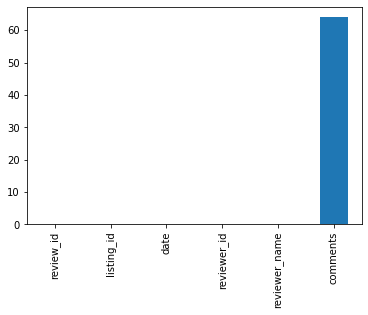

In [409]:
#Visualization of the empty values.
df_reviews.isna().sum().plot(kind='bar')


In [272]:
df_reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...
...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge,The place as it's shown in the photos. Great l...
62983,62984,53600839,2021-12-12,6635741,Dániel,The spacious apartment is idyllically located ...
62984,62985,53819793,2021-12-21,247934155,Gijs,It was great
62985,62986,53825194,2021-12-19,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...


In [273]:
df_reviews.nunique()


review_id        62987
listing_id        1525
date              2942
reviewer_id      58438
reviewer_name    13605
comments         61443
dtype: int64

In [410]:
#Grouping listing_ids with the review_id to count number of reviews per listing id.
df_reviews=pd.read_sql_table('reviews','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
number_of_reviews_by_listing = df_reviews.groupby('listing_id').review_id.count()
number_of_reviews_by_listing


listing_id
50904         2
116134      120
218916       28
224333        3
224682      349
           ... 
53522234      2
53538847      1
53600839      1
53819793      1
53825194      2
Name: review_id, Length: 1525, dtype: int64

In [347]:
#Finding the length of characters of comments
df_reviews=pd.read_sql_table('reviews','sqlite:///E:/HB^2/Vired/Project 2/airbnb.db')
def number_count(x):
    if x:
        return len(x)
df_reviews["comment_length"]=df_reviews.comments.map(lambda x: number_count(x))
df_reviews    
#new=df_reviews.comments.tolist()


,review_id,listing_id,date,reviewer_id,reviewer_name,comments,comment_length
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,418.0
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",93.0
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",327.0
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar...",543.0
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...,381.0
...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge,The place as it's shown in the photos. Great l...,177.0
62983,62984,53600839,2021-12-12,6635741,Dániel,The spacious apartment is idyllically located ...,1282.0
62984,62985,53819793,2021-12-21,247934155,Gijs,It was great,12.0
62985,62986,53825194,2021-12-19,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,67.0


In [346]:
number_of_coments_by_listing = df_reviews.groupby('listing_id').comment_length.mean()
number_of_coments_by_listing

listing_id
50904        255.500000
116134       265.266667
218916       385.678571
224333       193.666667
224682       253.350575
               ...     
53522234     211.500000
53538847     177.000000
53600839    1282.000000
53819793      12.000000
53825194      79.500000
Name: comment_length, Length: 1525, dtype: float64

In [411]:
#Merging review id and comment length with the reference of listing id
df_reviews_new= pd.merge(number_of_reviews_by_listing,number_of_coments_by_listing, on='listing_id')
df_reviews_new

,review_id,comment_length
listing_id,,
50904,2,255.500000
116134,120,265.266667
218916,28,385.678571
224333,3,193.666667
224682,349,253.350575
...,...,...
53522234,2,211.500000
53538847,1,177.000000
53600839,1,1282.000000


In [348]:
#Finding out the number of days since we receive a last review
from datetime import datetime

now = datetime.now()
latest_comment_date=df_reviews.groupby('listing_id').date.max()
date=[]
for i in latest_comment_date:
    date.append(now-i)
latest_comment_date=date 
latest_comment_date
df_reviews_new['days_since_last_review']= latest_comment_date 
df_reviews_new

,review_id,comment_length,days_since_last_review
listing_id,,,
50904,2,255.500000,203 days 15:49:15.404117
116134,120,265.266667,134 days 15:49:15.404117
218916,28,385.678571,238 days 15:49:15.404117
224333,3,193.666667,353 days 15:49:15.404117
224682,349,253.350575,131 days 15:49:15.404117
...,...,...,...
53522234,2,211.500000,133 days 15:49:15.404117
53538847,1,177.000000,147 days 15:49:15.404117
53600839,1,1282.000000,140 days 15:49:15.404117


##### c) Listings Table

In [372]:
df_listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


<AxesSubplot:>

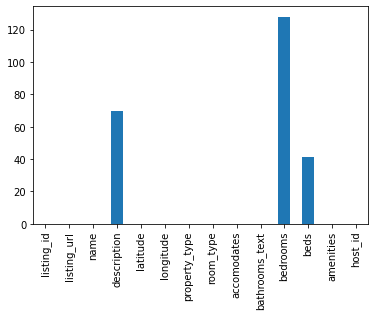

In [363]:
df_listings.isna().sum().plot(kind='bar')

In [374]:
df_listings.nunique()

listing_id        1749
listing_url       1749
name              1710
description       1556
latitude          1372
longitude         1483
property_type       39
room_type            4
accomodates         15
bathrooms_text      26
bedrooms            13
beds                19
amenities         1656
host_id           1111
dtype: int64

##### d) Host table

In [412]:
df_hosts

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",None
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...
...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30,BE,None
1107,435722877,Tatjana,2021-12-12,BE,None
1108,435999398,Flor,2021-12-14,"Antwerp, Flanders, Belgium",None
1109,436739371,Naser,2021-12-20,BE,None


<AxesSubplot:>

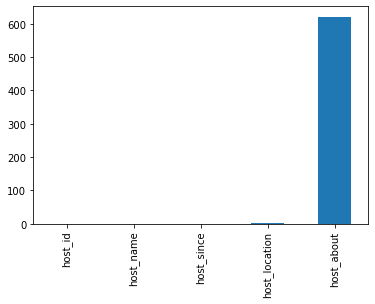

In [414]:
df_hosts.isna().sum().plot(kind='bar')

In [415]:
df_hosts.nunique()

host_id          1111
host_name         749
host_since        927
host_location     149
host_about        488
dtype: int64

### 7. Merging Data

#### a) Merging Listing and calender table

In [388]:
df_new1= pd.merge(df_listings,df_cal_new, on='listing_id',how='inner')
df_new1

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,166029.333333,0.0,166.666667,158.666667,1.0,60.0
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,173487.666667,1.0,150.000000,150.000000,2.0,1125.0
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,163471.333333,0.0,85.000000,85.000000,1.0,50.0
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,193003.333333,1.0,16.000000,16.000000,14.0,365.0
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,111238.333333,1.0,85.000000,85.000000,2.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,65968.000000,1.0,88.000000,88.000000,3.0,365.0
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,120818.666667,1.0,49.000000,49.000000,20.0,1125.0
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639,163447.666667,1.0,90.000000,90.000000,1.0,365.0
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,191385.000000,1.0,990.000000,990.000000,2.0,1125.0


In [384]:
df_new2.isna().sum()

listing_id                  0
listing_url                 0
name                        0
description                70
latitude                    0
longitude                   0
property_type               0
room_type                   0
accomodates                 0
bathrooms_text              0
bedrooms                  128
beds                       41
amenities                   0
host_id                     0
calender_id                 0
available                   0
price                       1
adjusted_price              1
minimum_nights              0
maximum_nights              0
review_id                 224
comment_length            224
days_since_last_review    224
dtype: int64

#### b) Merging Host Table 

In [399]:
df_new2= pd.merge(df_new1,df_hosts, on='host_id',how='inner')
df_new2

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,166029.333333,0.0,166.666667,158.666667,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,30099.000000,0.0,175.000000,175.000000,1.666667,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
2,891907,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,202081.333333,1.0,215.000000,215.000000,3.000000,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
3,2543695,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,114260.666667,1.0,200.000000,200.000000,2.000000,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
4,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,173487.666667,1.0,150.000000,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53913552,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,Deze unieke accommodatie heeft een geheel eige...,51.218570,4.435350,Entire loft,Entire home/apt,2,1 bath,...,152265.666667,1.0,50.000000,50.000000,1.000000,365.0,Yassin,2017-12-29,"Kontich, Flanders, Belgium",None
1745,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,...,65968.000000,1.0,88.000000,88.000000,3.000000,365.0,Michael,2015-10-11,"Antwerp, Flanders, Belgium",None
1746,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,...,120818.666667,1.0,49.000000,49.000000,20.000000,1125.0,Jürgen,2016-05-27,"Waalwijk, North Brabant, Netherlands",None
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,...,191385.000000,1.0,990.000000,990.000000,2.000000,1125.0,Kelly,2020-11-30,BE,None


#### c) Merging Review Table 

In [400]:
df_final= pd.merge(df_new2,df_reviews_new, on='listing_id',how='left')
df_final

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,adjusted_price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,review_id,comment_length,days_since_last_review
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,158.666667,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,255.500000,203 days 15:49:15.404117
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,175.000000,1.666667,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,127.000000,352 days 15:49:15.404117
2,891907,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,215.000000,3.000000,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,6.0,300.166667,267 days 15:49:15.404117
3,2543695,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,200.000000,2.000000,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,15.0,362.866667,180 days 15:49:15.404117
4,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,120.0,265.266667,134 days 15:49:15.404117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53913552,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,Deze unieke accommodatie heeft een geheel eige...,51.218570,4.435350,Entire loft,Entire home/apt,2,1 bath,...,50.000000,1.000000,365.0,Yassin,2017-12-29,"Kontich, Flanders, Belgium",None,NaN,NaN,NaT
1745,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,...,88.000000,3.000000,365.0,Michael,2015-10-11,"Antwerp, Flanders, Belgium",None,NaN,NaN,NaT
1746,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,...,49.000000,20.000000,1125.0,Jürgen,2016-05-27,"Waalwijk, North Brabant, Netherlands",None,NaN,NaN,NaT
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,...,990.000000,2.000000,1125.0,Kelly,2020-11-30,BE,None,NaN,NaN,NaT


### 8. Final Data

In [401]:
df_final

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,adjusted_price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,review_id,comment_length,days_since_last_review
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,158.666667,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,255.500000,203 days 15:49:15.404117
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,175.000000,1.666667,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0,127.000000,352 days 15:49:15.404117
2,891907,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,215.000000,3.000000,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,6.0,300.166667,267 days 15:49:15.404117
3,2543695,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,200.000000,2.000000,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,15.0,362.866667,180 days 15:49:15.404117
4,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,120.0,265.266667,134 days 15:49:15.404117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53913552,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,Deze unieke accommodatie heeft een geheel eige...,51.218570,4.435350,Entire loft,Entire home/apt,2,1 bath,...,50.000000,1.000000,365.0,Yassin,2017-12-29,"Kontich, Flanders, Belgium",None,NaN,NaN,NaT
1745,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,...,88.000000,3.000000,365.0,Michael,2015-10-11,"Antwerp, Flanders, Belgium",None,NaN,NaN,NaT
1746,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,...,49.000000,20.000000,1125.0,Jürgen,2016-05-27,"Waalwijk, North Brabant, Netherlands",None,NaN,NaN,NaT
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,...,990.000000,2.000000,1125.0,Kelly,2020-11-30,BE,None,NaN,NaN,NaT
